>**Load the libraries, mount drive and load data**

In [ ]:
!pip install kmodes
!pip install xgboost
!pip install lightgbm
!pip install mlxtend
!pip install Boruta
%pip install mlxtend --upgrade
#################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
from kmodes.kmodes import KModes
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from scipy.stats.stats import kendalltau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.datasets import make_blobs
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
%matplotlib inline
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


> **DATA PREPROCESSING**

In [ ]:
non_genetic_data=pd.read_csv("/content/drive/MyDrive/d2k/tarrc_nongenomic.csv")

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
non_genetic_data.shape

(14655, 787)

> **DATA CLEANING FUNCTION BLOCK**

In [ ]:
def final_preprocessing(data):
  #subset the data to the patient visits where blood samples are taken
  df_with_RBM = data[data['RBM_Rule_Based_Medicine']==1]
  #retain only relevant blood + protein + disorders features with biological factors like age, sex,etc.
  df = df_with_RBM[['PATID', 'AGE','A1_SEX', 'A3_DADDEM', 'A3_MOMDEM', 'A5_ALCOHOL', 'A5_ARTHRITIC', 'A5_AUTOIMM', 'A5_B12DEF',
 'A5_CANCER', 'A5_CBSTROKE', 'A5_CBTIA', 'A5_CVAFIB', 'A5_CVANGIO', 'A5_CVBYPASS', 'A5_CVCHF', 'A5_CVHATT', 'A5_CVPACE',
 'A5_DIABETES', 'A5_HYPERCHO','A5_HYPERTEN', 'A5_IBD', 'A5_INCONTF', 'A5_INCONTU', 'A5_PD', 'A5_PSYCDIS', 'A5_THYROID',
 'A5_TRAUMBRF', 'A5_TRAUMCHR', 'B1_BMI', 'B1_BPDIAS', 'B1_BPSYS', 'B5_DEL', 'B5_HALL', 'B5_AGIT', 'B5_DEPD', 'B5_ANX',
 'B5_ELAT', 'B5_APA', 'B5_DISN', 'B5_IRR', 'B5_MOT', 'B5_NITE', 'B5_APP', 'D1_BRNINJ', 'D1_CORT', 'D1_DEP', 'D1_DYSILL',
 'D1_HYCEPH', 'D1_NEOP', 'D1_PARK', 'D1_PPAPH', 'D1_STROKE', 'D1_VASC', 'X1_OBESE_AB', 'X1_OBESE_IS','P1_PT_TYPE',
 'PROTEO_ADIPONECTIN', 'PROTEO_BFGF', 'PROTEO_CLUSTERIN', 'PROTEO_CRP', 'PROTEO_EOTAXIN_HUMAN', 'PROTEO_FABP3', 'PROTEO_FACTOR_VII',
 'PROTEO_FLT_1', 'PROTEO_GLUCAGON', 'PROTEO_GM_CSF_HUMAN', 'PROTEO_IFN_Y_HUMAN', 'PROTEO_IL_10_HUMAN',
 'PROTEO_IL_12_P40_HUMAN','PROTEO_IL_15', 'PROTEO_IL_16', 'PROTEO_IL_1B_HUMAN', 'PROTEO_IL_2_HUMAN', 'PROTEO_IL_5_HUMAN', 'PROTEO_IL_6_HUMAN',
 'PROTEO_IL_7_HUMAN', 'PROTEO_IL_8_HUMAN', 'PROTEO_INSULIN', 'PROTEO_IP_10_HUMAN', 'PROTEO_LBP', 'PROTEO_LEPTIN', 'PROTEO_MCP_1_HUMAN',
 'PROTEO_MCP_4_HUMAN', 'PROTEO_MDC_HUMAN', 'PROTEO_MIP_1A_HUMAN', 'PROTEO_MIP_1B_HUMAN', 'PROTEO_MPO', 'PROTEO_NT_PROBNP', 'PROTEO_PIGF',
 'PROTEO_PYY', 'PROTEO_RESISTIN', 'PROTEO_SAA', 'PROTEO_SICAM_1', 'PROTEO_SVCAM_1', 'PROTEO_TARC_HUMAN', 'PROTEO_TIE_2', 'PROTEO_TNF_A_HUMAN',
 'PROTEO_TNF_B', 'PROTEO_TOTAL_GIP', 'PROTEO_VEGF_ANGIO_PLATE', 'PROTEO_VEGF_CYTO_PLATE', 'PROTEO_VEGF_C', 'PROTEO_VEGF_D', 'RBM_ACE_CD143',
 'RBM_Adiponectin', 'RBM_AgRP', 'RBM_Alpha_1', 'RBM_Alpha_2', 'RBM_Alpga_F', 'RBM_Amphiregulin', 'RBM_ANG_2', 'RBM_Angiotensinogen',
 'RBM_APO_A1', 'RBM_APO_CIII','RBM_APO_H', 'RBM_AXL', 'RBM_BLC', 'RBM_B2M','RBM_BTC', 'RBM_BDNF', 'RBM_CRP', 'RBM_CA_125', 'RBM_CA_19_9',
 'RBM_CEA', 'RBM_CD40', 'RBM_CD40L', 'RBM_CgA', 'RBM_Complement_3', 'RBM_Cortisol', 'RBM_CK_MB', 'RBM_CTGF', 'RBM_EGF','RBM_EGF_R', 'RBM_ENA_78',
 'RBM_EN_RAGE', 'RBM_Eotaxin', 'RBM_Eotaxin_3', 'RBM_Epiregulin', 'RBM_Factor_VII', 'RBM_FAS', 'RBM_FASL', 'RBM_FABP', 'RBM_Ferritin', 'RBM_Fibrinogen',
 'RBM_FSH', 'RBM_G_CSF', 'RBM_GSTs', 'RBM_GRO_alpha', 'RBM_GH', 'RBM_Haptoglobin', 'RBM_HB_EGF', 'RBM_HCC_4', 'RBM_HGF', 'RBM_I_309', 'RBM_ICAM_1',
 'RBM_IFNg', 'RBM_IgA', 'RBM_IgE', 'RBM_IGF_1', 'RBM_IGF_BP_2', 'RBM_IgM', 'RBM_IL_10', 'RBM_IL_12p40', 'RBM_IL_13', 'RBM_IL_15', 'RBM_IL_16',
 'RBM_IL_18', 'RBM_IL_1ra', 'RBM_IL_3', 'RBM_IL_5', 'RBM_IL_7', 'RBM_IL_8', 'RBM_Insulin', 'RBM_Leptin', 'RBM_LH', 'RBM_Lpa', 'RBM_MCP_1',
 'RBM_MDC', 'RBM_MIF', 'RBM_MIP_1a', 'RBM_MIP_1b', 'RBM_MMP_3', 'RBM_MPO', 'RBM_Myoglobin', 'RBM_PAI_1', 'RBM_PP', 'RBM_PDGF', 'RBM_Progesterone',
 'RBM_Prolactin', 'RBM_PAP', 'RBM_PARC', 'RBM_RANTES', 'RBM_Resistin', 'RBM_S100b', 'RBM_SAP', 'RBM_SGOT', 'RBM_SHBG', 'RBM_SOD', 'RBM_Sortilin',
 'RBM_sRAGE', 'RBM_SCF', 'RBM_Tenascin_C', 'RBM_Testosterone', 'RBM_TGF_alpha', 'RBM_THPO', 'RBM_THPO_1', 'RBM_TECK', 'RBM_TSH', 'RBM_TBG',
 'RBM_TIMP_1', 'RBM_TF', 'RBM_TNF_RII', 'RBM_TNF_alpha', 'RBM_TNF_beta', 'RBM_TRAIL_R3', 'RBM_VCAM_1', 'RBM_VEGF', 'RBM_VWF']]
  
  #replace empty strings with NaN values
  df = df.replace(r'^\s*$', np.nan, regex=True)
  #removing rows which contain missing vals in all RBM features
  all_cols = df.columns
  regex_rbm = re.compile("^RBM_.*$")
  rbm_cols = list(filter(regex_rbm.match, all_cols))
  df = df[df[rbm_cols].apply(pd.Series.nunique, axis=1) > 1]

  #Removing rows with missing vals in proteo features
  missing_rows = list(df[df == -777777].count()[df[df == -777777].count() > 0].index)
  indices = []
  for row in missing_rows:
    for ind in list(df[df[row] == -777777].index):
      indices.append(ind)

  indices = [*set(indices)]
  indices
  df = df.drop(indices, axis=0)

  #Tranforming extreme values in proteo features
  # -888888(GHDL) mapped to highest possible value and LLDL mapped to least value
  df = df.replace(-888888, 999999999)
  df = df.replace(-999999, 0)

  #convert categorical object columns to floats
  categoricalcols=list(df.dtypes[df.dtypes==object].index)
  df[categoricalcols]=df[categoricalcols].astype(float)

  #removing patient record which has 2 visits
  df = df.drop(3217, axis=0)

  #removing diagnosis variables that are 3 or 4
  df = df[df['P1_PT_TYPE'].isin([1,2])]
  return df


In [ ]:
df = final_preprocessing(non_genetic_data)
df.shape

(563, 219)

In [86]:
df.head(5)

,PATID,AGE,A1_SEX,A3_DADDEM,A3_MOMDEM,A5_ALCOHOL,A5_ARTHRITIC,A5_AUTOIMM,A5_B12DEF,A5_CANCER,...,RBM_TBG,RBM_TIMP_1,RBM_TF,RBM_TNF_RII,RBM_TNF_alpha,RBM_TNF_beta,RBM_TRAIL_R3,RBM_VCAM_1,RBM_VEGF,RBM_VWF
1,11001221,84,1,0,0,2,0,0,0,0,...,59.0,126.0,0.53,5.0,1.9,1.35,7.4,592.0,531.0,40.0
8,11001300,68,0,0,0,0,0,0,0,0,...,83.0,160.0,0.09,4.1,1.5,1.35,18.0,473.0,712.0,39.0
16,11001372,76,0,0,0,0,0,0,0,0,...,47.0,157.0,0.18,4.4,1.8,1.35,11.0,575.0,520.0,44.0
27,11001405,86,0,0,0,0,0,0,0,0,...,61.0,260.0,0.31,6.0,6.1,1.15,7.8,885.0,707.0,73.0
31,11001429,82,0,1,0,0,0,0,0,0,...,54.0,261.0,0.14,9.2,3.4,1.15,7.1,774.0,1840.0,27.0


In [ ]:
df['P1_PT_TYPE'].value_counts()

2    282
1    281
Name: P1_PT_TYPE, dtype: int64

In [ ]:
len(df['PATID'].unique())

563

In [ ]:
# list(df2.columns)
df2 = df.drop(['PATID'], axis=1)

*Splitting into X (biomarkers) and y(diagnosis)*

In [ ]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']

*FEATURE SELECTION*

**STAT BASED FEATURE SELECTION**
1. Chi Square 
2. Mutual Information Test 

**EMBEDDED FEATURE SELECTION**
3. Random Forest

**WRAPPER BASED**

4. Recursive Feature Elimination: Using Decision Tree Classifier 
5. Recursive Feature Elimination: Using Random Forest Classifier
6. Forward Feature Selection: Using Decision Tree Classifier 
7. Forward Feature Selection: Using Random Forest Classifier 
8. Backwards Features Elimination: Using Log Reg
9. Backwards Feature Elimination: Using Decision Tree Classifer 

**OTHER**
10. **BORUTA PACKAGE** : Random Forest Based 

*STAT BASED FEATURE SELECTION*

> **CHI SQUARE TEST**

In [ ]:
# df3=df2
# df3[df3<0]=99 #Chi square doesn't recognize negative values- missing values aka -9 are resubstituted as 99

In [ ]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']
chi=chi2(X,y)   #returns f score and p value 

#Chi Test Score
chi_score=chi[1].tolist()

# #Chi Test Features
chi_features=list(X)

chi_dict = {'Features':chi_features,'Score':chi_score}
chi_df=pd.DataFrame(chi_dict)
chi_df=chi_df.sort_values(by='Score', ascending=False)
chi_df=chi_df.head(30)

chi_df

,Features,Score
167,RBM_IL_3,0.963306
12,A5_CVANGIO,0.899774
4,A5_ALCOHOL,0.895016
24,A5_PSYCDIS,0.894610
201,RBM_Testosterone,0.892959
197,RBM_Sortilin,0.868077
186,RBM_Progesterone,0.854444
105,RBM_Alpha_1,0.846468
177,RBM_MIF,0.830416
126,RBM_Complement_3,0.807185


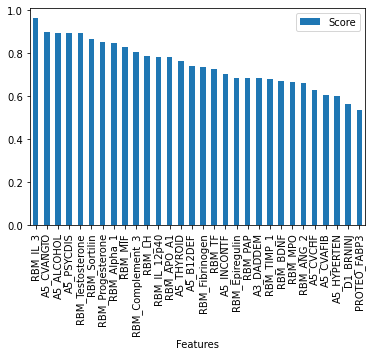

In [ ]:
chi_df.plot.bar(x='Features',y='Score')
plt.savefig("/content/drive/MyDrive/d2k/2_ChiSquare2.pdf", format="pdf", bbox_inches="tight")
plt.show()

> **MUTUAL INFORMATION TEST**

In [ ]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']
mi= MIC(X,y)

#Mutual Info Features
mi_cols=list(X.columns)

#Mutual Info Scores
mi_score=mi.tolist()


mi_dict = {'Features':mi_cols,'Score':mi_score}
mi_df=pd.DataFrame(mi_dict)
mi_df=mi_df.sort_values(by='Score', ascending=False)
mi_df=mi_df.head(30)


mi_df
# columnnames=['Fibrinogen', 'Tumor Necrosis Factor beta','Thrombopoietin', 'Interferon gamma','Interleukin 12p40',
#              'Betacellulin','Interleukin 5', 'Interleukin 10', 'Interleukin 15','Tumor Necrosis Factor alpha',
#              'Interleukin 7', 'Agouti-Related Protein', 'Peptide YY', 'Angiopoietin 2','Heparin-binding growth factor',
#              'Epiregulin','Eotaxin','Age','Amphiregulin','Pro-B–type Natriuretic Peptide', 
#              'Pancreatic polypeptide','Resistin','Ferritin','Serum amyloid A','Glutathione S-Transferase',
#              'Insulin-like growth factors','Fas-Ligand','Cancer Antigen 125','Stem Cell Factor','Systolic blood pressure']
# mi_df['Features']=columnnames

,Features,Score
154,RBM_IFNg,0.163917
142,RBM_Fibrinogen,0.159945
203,RBM_THPO,0.150040
212,RBM_TNF_beta,0.142859
161,RBM_IL_12p40,0.135066
135,RBM_Eotaxin_3,0.109250
169,RBM_IL_7,0.105498
117,RBM_BTC,0.104450
33,B5_AGIT,0.099938
163,RBM_IL_15,0.099397


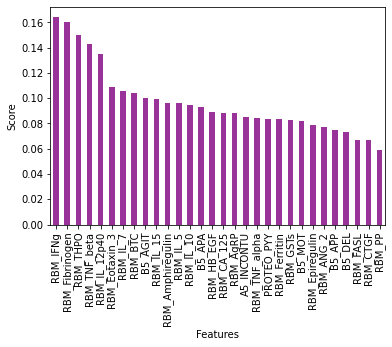

In [ ]:
mi_df.plot.bar(x='Features',y='Score',legend=None, color='purple',alpha=0.8)
plt.ylabel('Score')
plt.savefig("/content/drive/MyDrive/d2k/3_MutualInfo2.pdf", format="pdf", bbox_inches="tight")
plt.show()

*EMBEDDED FEATURE SELECTION*

> **RANDOM FOREST BASED FEATURE SELECTION**

In [ ]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#Standard Scaling
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

Xcols=list(X.columns)
X_train_std=pd.DataFrame(X_train_std, columns=Xcols)
X_test_std=pd.DataFrame(X_test_std, columns=Xcols)

#Fitting the model
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_std, y_train.values.ravel())

#RF Score
rf_score=forest.feature_importances_.tolist()

#RF Features
rf_features=list(X.columns)

rf_dict = {'Features':rf_features,'Score':rf_score}
rf_df=pd.DataFrame(rf_dict)
rf_df=rf_df.sort_values(by='Score', ascending=False)
rf_df=rf_df.head(30)

rf_df

,Features,Score
37,B5_APA,0.028167
203,RBM_THPO,0.027572
0,AGE,0.027302
184,RBM_PP,0.019830
212,RBM_TNF_beta,0.019795
42,B5_APP,0.019393
38,B5_DISN,0.019008
35,B5_ANX,0.017491
58,PROTEO_CRP,0.016749
41,B5_NITE,0.015911


In [ ]:
# columnnames=['Thrombopoietin','Age','Tumor Necrosis Factor beta','Eotaxin', 'Pancreatic polypeptide',
#              'Peptide YY','Beta-2 Microglobulin','S100 calcium-binding protein B','Interleukin 8','Leptin',
#              'Interleukin 10', 'Cortisol','Insulin-like growth factor2','Angiotensin Converting Enzyme','Apoptosis-inducing ligand',
#              'C Reactive Protein (Blood)', 'Tenascin C','von Willebrand Factor','Systolic blood pressure','Agouti-Related Protein',
#              'Pro-B–type Natriuretic Peptide', 'C Reactive Protein (Protein)','Fas-Ligand', 'Interferon y','Tumor Necrosis Factor alpha',
#              'Alpha-2 Macroglobulin','Carcinoembryonic Antigen','BMI','Prolactin','IgM antibodies']

# rf_df['Features']=columnnames

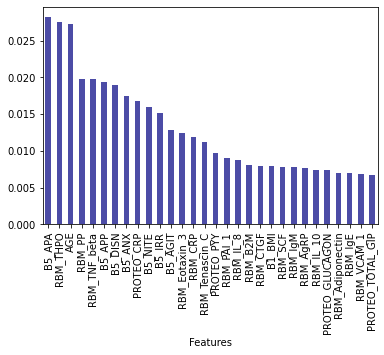

In [ ]:
rf_df.plot.bar(x='Features',y='Score',legend=None, color='navy',alpha=0.7)
plt.savefig("/content/drive/MyDrive/d2k/4_RandomForest2.pdf", format="pdf", bbox_inches="tight")
plt.show()

*WRAPPER BASED FEATURE SELECTION*

**RECURSIVE FEATURE SELECTION**
Using Random Forest

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=30)
rfs=rfe.fit(X, y)

#RFS Features
rfs_features= list(X.columns)

#RFS Scores
rfs_score= rfs.support_.tolist()

rfs_dict = {'Features':rfs_features,'Score':rfs_score}


In [ ]:
rfs_df= pd.DataFrame.from_dict(rfs_dict)
rfs_df=rfs_df.loc[rfs_df['Score'] == True]
rfs_df

,Features,Score
0,AGE,True
30,B1_BPSYS,True
33,B5_AGIT,True
35,B5_ANX,True
37,B5_APA,True
38,B5_DISN,True
42,B5_APP,True
58,PROTEO_CRP,True
65,PROTEO_IFN_Y_HUMAN,True
88,PROTEO_PYY,True


**RECURSIVE FEATURE SELECTION**
Using Decision Tree

In [ ]:
rfe2 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
rfs2 = rfe2.fit(X, y)

#RFS Features
rfs2_features= list(X.columns)

#RFS Scores
rfs2_score= rfs2.support_.tolist()

rfs2_dict = {'Features':rfs2_features,'Score':rfs2_score}

In [ ]:
rfs2_df= pd.DataFrame.from_dict(rfs2_dict)
rfs2_df=rfs2_df.loc[rfs2_df['Score'] == True]
rfs2_df

,Features,Score
0,AGE,True
22,A5_INCONTU,True
35,B5_ANX,True
37,B5_APA,True
58,PROTEO_CRP,True
78,PROTEO_LBP,True
85,PROTEO_MPO,True
90,PROTEO_SAA,True
103,RBM_Adiponectin,True
106,RBM_Alpha_2,True


> **FORWARD FEATURES SELECTION**: Using Decision Tree Classifier



In [ ]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']

model = DecisionTreeClassifier()
ff1 = sfs(model, k_features=30, forward=True, verbose=2, scoring='accuracy')
ff1 = ff1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 217 out of 217 | elapsed:    2.4s finished

[2022-11-14 17:41:27] Features: 1/30 -- score: 0.646570796460177[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    2.2s finished

[2022-11-14 17:41:29] Features: 2/30 -- score: 0.7050726927939317[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 215 out of 215 | elapsed:    2.2s finished

[2022-11-14 17:41:31] Features: 3/30 -- score: 0.7354772439949431[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
ff1.subsets_

{1: {'feature_idx': (37,),
  'cv_scores': array([0.67256637, 0.62831858, 0.61946903, 0.59821429, 0.71428571]),
  'avg_score': 0.646570796460177,
  'feature_names': ('B5_APA',)},
 2: {'feature_idx': (33, 37),
  'cv_scores': array([0.73451327, 0.71681416, 0.7079646 , 0.625     , 0.74107143]),
  'avg_score': 0.7050726927939317,
  'feature_names': ('B5_AGIT', 'B5_APA')},
 3: {'feature_idx': (0, 33, 37),
  'cv_scores': array([0.63716814, 0.69026549, 0.80530973, 0.75      , 0.79464286]),
  'avg_score': 0.7354772439949431,
  'feature_names': ('AGE', 'B5_AGIT', 'B5_APA')},
 4: {'feature_idx': (0, 33, 37, 38),
  'cv_scores': array([0.6460177 , 0.71681416, 0.80530973, 0.77678571, 0.80357143]),
  'avg_score': 0.7496997471554995,
  'feature_names': ('AGE', 'B5_AGIT', 'B5_APA', 'B5_DISN')},
 5: {'feature_idx': (0, 17, 33, 37, 38),
  'cv_scores': array([0.66371681, 0.7079646 , 0.82300885, 0.78571429, 0.82142857]),
  'avg_score': 0.7603666245259164,
  'feature_names': ('AGE', 'A5_DIABETES', 'B5_AGIT'

In [ ]:
ff1_dict=ff1.get_metric_dict(confidence_interval=0.8)
ff1_df = pd.DataFrame.from_dict(ff1_dict).T
ff1_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(37,)","[0.672566371681416, 0.6283185840707964, 0.6194...",0.646571,"(B5_APA,)",0.030724,0.041634,0.020817
2,"(33, 37)","[0.7345132743362832, 0.7168141592920354, 0.707...",0.705073,"(B5_AGIT, B5_APA)",0.030818,0.041762,0.020881
3,"(0, 33, 37)","[0.6371681415929203, 0.6902654867256637, 0.805...",0.735477,"(AGE, B5_AGIT, B5_APA)",0.047017,0.063713,0.031857
4,"(0, 33, 37, 38)","[0.6460176991150443, 0.7168141592920354, 0.805...",0.7497,"(AGE, B5_AGIT, B5_APA, B5_DISN)",0.04496,0.060926,0.030463
5,"(0, 17, 33, 37, 38)","[0.6637168141592921, 0.7079646017699115, 0.823...",0.760367,"(AGE, A5_DIABETES, B5_AGIT, B5_APA, B5_DISN)",0.047115,0.063847,0.031924
6,"(0, 17, 31, 33, 37, 38)","[0.6637168141592921, 0.7168141592920354, 0.823...",0.762137,"(AGE, A5_DIABETES, B5_DEL, B5_AGIT, B5_APA, B5...",0.046105,0.062478,0.031239
7,"(0, 5, 17, 31, 33, 37, 38)","[0.6637168141592921, 0.7168141592920354, 0.823...",0.762137,"(AGE, A5_ARTHRITIC, A5_DIABETES, B5_DEL, B5_AG...",0.046105,0.062478,0.031239
8,"(0, 5, 6, 17, 31, 33, 37, 38)","[0.6637168141592921, 0.7168141592920354, 0.823...",0.762137,"(AGE, A5_ARTHRITIC, A5_AUTOIMM, A5_DIABETES, B...",0.046105,0.062478,0.031239
9,"(0, 5, 6, 8, 17, 31, 33, 37, 38)","[0.6637168141592921, 0.7168141592920354, 0.823...",0.762137,"(AGE, A5_ARTHRITIC, A5_AUTOIMM, A5_CANCER, A5_...",0.046105,0.062478,0.031239
10,"(0, 5, 6, 8, 17, 20, 31, 33, 37, 38)","[0.6637168141592921, 0.7168141592920354, 0.823...",0.762137,"(AGE, A5_ARTHRITIC, A5_AUTOIMM, A5_CANCER, A5_...",0.046105,0.062478,0.031239


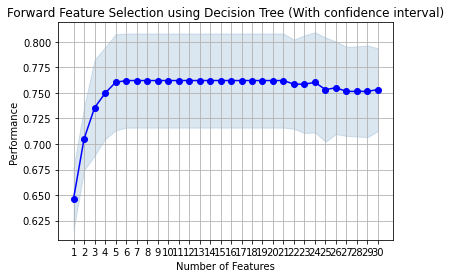

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1=plot_sfs(ff1_dict, kind='ci')
plt.title('Forward Feature Selection using Decision Tree (With confidence interval)')
plt.savefig("/content/drive/MyDrive/d2k/5_ForwardFeature.pdf2", format="pdf", bbox_inches="tight")
plt.grid()
plt.show()

In [70]:
ff1_features=list(ff1_df['feature_names'][24])
ff1_features

['AGE',
 'A5_ARTHRITIC',
 'A5_AUTOIMM',
 'A5_CANCER',
 'A5_CBSTROKE',
 'A5_DIABETES',
 'A5_IBD',
 'A5_PD',
 'B5_DEL',
 'B5_HALL',
 'B5_AGIT',
 'B5_ELAT',
 'B5_APA',
 'B5_DISN',
 'D1_BRNINJ',
 'D1_CORT',
 'D1_DYSILL',
 'D1_HYCEPH',
 'D1_NEOP',
 'D1_PARK',
 'D1_STROKE',
 'D1_VASC',
 'X1_OBESE_AB',
 'PROTEO_IL_1B_HUMAN']

> **FORWARD FEATURE SELECTION**: Using Random Forest

In [ ]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']

model = RandomForestClassifier()
ff2 = sfs(model, k_features=30, forward=True, verbose=2, scoring='accuracy')
ff2 = ff2.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 217 out of 217 | elapsed:  3.6min finished

[2022-11-14 18:02:39] Features: 1/30 -- score: 0.646570796460177[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  3.0min finished

[2022-11-14 18:05:40] Features: 2/30 -- score: 0.7107458912768647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 215 out of 215 | elapsed:  3.1min finished

[2022-11-14 18:08:44] Features: 3/30 -- score: 0.7302307206068269[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [31]:
ff2_dict=ff2.get_metric_dict(confidence_interval=0.8)
ff2_df = pd.DataFrame.from_dict(ff2_dict).T
ff2_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(37,)","[0.672566371681416, 0.6283185840707964, 0.6194...",0.646571,"(B5_APA,)",0.030724,0.041634,0.020817
2,"(0, 37)","[0.584070796460177, 0.6460176991150443, 0.7522...",0.710746,"(AGE, B5_APA)",0.060273,0.081677,0.040839
3,"(0, 37, 38)","[0.6017699115044248, 0.6814159292035398, 0.787...",0.730231,"(AGE, B5_APA, B5_DISN)",0.056897,0.077102,0.038551
4,"(0, 13, 37, 38)","[0.6283185840707964, 0.7168141592920354, 0.778...",0.742636,"(AGE, A5_CVBYPASS, B5_APA, B5_DISN)",0.047924,0.064942,0.032471
5,"(0, 13, 37, 38, 39)","[0.6460176991150443, 0.7522123893805309, 0.796...",0.756795,"(AGE, A5_CVBYPASS, B5_APA, B5_DISN, B5_IRR)",0.043493,0.058938,0.029469
6,"(0, 13, 37, 38, 39, 212)","[0.6814159292035398, 0.7256637168141593, 0.814...",0.781748,"(AGE, A5_CVBYPASS, B5_APA, B5_DISN, B5_IRR, RB...",0.048939,0.066319,0.033159
7,"(0, 13, 37, 38, 39, 52, 212)","[0.6814159292035398, 0.7433628318584071, 0.849...",0.795939,"(AGE, A5_CVBYPASS, B5_APA, B5_DISN, B5_IRR, D1...",0.052423,0.07104,0.03552
8,"(0, 13, 37, 38, 39, 52, 167, 212)","[0.7079646017699115, 0.7079646017699115, 0.858...",0.79951,"(AGE, A5_CVBYPASS, B5_APA, B5_DISN, B5_IRR, D1...",0.05614,0.076077,0.038039
9,"(0, 13, 37, 38, 39, 40, 52, 167, 212)","[0.7345132743362832, 0.7345132743362832, 0.840...",0.799447,"(AGE, A5_CVBYPASS, B5_APA, B5_DISN, B5_IRR, B5...",0.039629,0.053702,0.026851
10,"(0, 13, 17, 37, 38, 39, 40, 52, 167, 212)","[0.7256637168141593, 0.7345132743362832, 0.893...",0.811868,"(AGE, A5_CVBYPASS, A5_DIABETES, B5_APA, B5_DIS...",0.05059,0.068556,0.034278


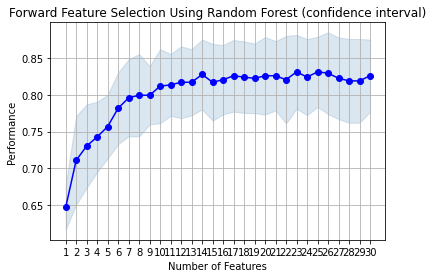

In [32]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig2=plot_sfs(ff2_dict, kind='ci')
plt.title('Forward Feature Selection Using Random Forest (confidence interval)')
plt.grid()
plt.show()

In [33]:
ff2_features=list(ff2_df['feature_names'][30])
ff2_features

['AGE',
 'A3_MOMDEM',
 'A5_ARTHRITIC',
 'A5_AUTOIMM',
 'A5_CVBYPASS',
 'A5_CVCHF',
 'A5_DIABETES',
 'A5_IBD',
 'A5_PD',
 'B1_BPDIAS',
 'B5_DEL',
 'B5_AGIT',
 'B5_DEPD',
 'B5_ELAT',
 'B5_APA',
 'B5_DISN',
 'B5_IRR',
 'B5_MOT',
 'D1_DYSILL',
 'D1_HYCEPH',
 'D1_NEOP',
 'D1_PARK',
 'D1_PPAPH',
 'D1_VASC',
 'X1_OBESE_AB',
 'PROTEO_IL_6_HUMAN',
 'RBM_IL_3',
 'RBM_IL_8',
 'RBM_S100b',
 'RBM_TNF_beta']

> **BACKWARDS FEATURES ELIMINATION**: 
Using Log Reg

In [34]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']

bf1 = sfs(LogisticRegression(), k_features=30, forward=False, verbose=1, scoring='accuracy')
bf1 = bf1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 217 out of 217 | elapsed:  1.2min finished
Features: 216/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  1.1min finished
Features: 215/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 215 out of 215 | elapsed:  1.1min finished
Features: 214/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 214 out of 214 | elapsed:  1.1min finished
Features: 213/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:  1.2min finished
Features: 212/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:  1.1min finished
Features: 211/

In [58]:
bf1_dict=bf1.get_metric_dict(confidence_interval=0.95)
bf1_df = pd.DataFrame.from_dict(bf1_dict).T
bf1_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
217,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5309734513274337, 0.6106194690265486, 0.637...",0.602181,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.05544,0.043134,0.021567
216,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.625237,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.054399,0.042324,0.021162
215,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.628808,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.052198,0.040612,0.020306
214,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.628808,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.052198,0.040612,0.020306
213,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.628808,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.052198,0.040612,0.020306
212,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.628808,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.052198,0.040612,0.020306
211,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.628808,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.052198,0.040612,0.020306
210,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.628808,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.052198,0.040612,0.020306
209,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.628808,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.052198,0.040612,0.020306
208,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5575221238938053, 0.672566371681416, 0.6371...",0.628808,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.052198,0.040612,0.020306


In [82]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# fig1=plot_sfs(bf1_dict, kind='ci')
# plt.title('Backward Feature Selection using Log Regression (With confidence interval)')
# plt.xticks(rotation=90)
# plt.grid()
# plt.show()

In [37]:
bf1_features=list(bf1_df['feature_names'][30])
bf1_features

['B1_BPSYS',
 'PROTEO_ADIPONECTIN',
 'PROTEO_CLUSTERIN',
 'PROTEO_FACTOR_VII',
 'PROTEO_GM_CSF_HUMAN',
 'PROTEO_IL_10_HUMAN',
 'PROTEO_IL_16',
 'PROTEO_INSULIN',
 'PROTEO_LEPTIN',
 'PROTEO_MCP_4_HUMAN',
 'PROTEO_RESISTIN',
 'PROTEO_SAA',
 'PROTEO_SICAM_1',
 'PROTEO_SVCAM_1',
 'PROTEO_TARC_HUMAN',
 'PROTEO_VEGF_ANGIO_PLATE',
 'PROTEO_VEGF_CYTO_PLATE',
 'RBM_Eotaxin',
 'RBM_Eotaxin_3',
 'RBM_Factor_VII',
 'RBM_Ferritin',
 'RBM_GRO_alpha',
 'RBM_HB_EGF',
 'RBM_ICAM_1',
 'RBM_IgE',
 'RBM_IL_16',
 'RBM_IL_18',
 'RBM_IL_1ra',
 'RBM_MCP_1',
 'RBM_PDGF']

> **BACKWARDS FEATURES ELIMINATION**: Using Decision Tree Classifer

In [38]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']

model = DecisionTreeClassifier()
bf2 = sfs(model, k_features=30, forward=False, verbose=1, scoring='accuracy')
bf2 = bf2.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 217 out of 217 | elapsed:   51.2s finished
Features: 216/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   49.3s finished
Features: 215/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 215 out of 215 | elapsed:   51.3s finished
Features: 214/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 214 out of 214 | elapsed:   52.1s finished
Features: 213/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:   52.6s finished
Features: 212/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:   51.5s finished
Features: 211/

In [56]:
bf2_dict=bf2.get_metric_dict(confidence_interval=0.95)
bf2_df = pd.DataFrame.from_dict(bf2_dict).T
bf2_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
217,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.584070796460177, 0.4690265486725664, 0.7079...",0.621855,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.121112,0.094229,0.047115
216,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6548672566371682, 0.5221238938053098, 0.761...",0.662611,"(AGE, A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL...",0.101799,0.079203,0.039602
215,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6194690265486725, 0.5486725663716814, 0.699...",0.659166,"(A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL, A5_...",0.094793,0.073752,0.036876
214,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7345132743362832, 0.5575221238938053, 0.743...",0.691008,"(A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL, A5_...",0.091089,0.070871,0.035435
213,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6991150442477876, 0.6017699115044248, 0.743...",0.699921,"(A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL, A5_...",0.085316,0.066379,0.03319
212,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7079646017699115, 0.5752212389380531, 0.716...",0.6875,"(A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL, A5_...",0.086362,0.067192,0.033596
211,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6902654867256637, 0.5663716814159292, 0.734...",0.694659,"(A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL, A5_...",0.096377,0.074984,0.037492
210,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7079646017699115, 0.5663716814159292, 0.734...",0.691056,"(A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL, A5_...",0.083739,0.065152,0.032576
209,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6991150442477876, 0.5486725663716814, 0.743...",0.694659,"(A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL, A5_...",0.105601,0.082161,0.04108
208,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7522123893805309, 0.5486725663716814, 0.743...",0.692778,"(A1_SEX, A3_DADDEM, A3_MOMDEM, A5_ALCOHOL, A5_...",0.109675,0.085331,0.042666


In [68]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# fig1=plot_sfs(bf2_dict, kind='ci')
# plt.title('Backward Feature Selection using Random Forest Classifier (With confidence interval)')
# plt.grid()
# plt.show()

In [66]:
bf2_features=list(bf2_df['feature_names'][49])
bf2_features

['A5_CVAFIB',
 'A5_DIABETES',
 'B5_AGIT',
 'B5_ANX',
 'B5_APA',
 'B5_NITE',
 'B5_APP',
 'D1_VASC',
 'PROTEO_CLUSTERIN',
 'PROTEO_IL_15',
 'PROTEO_IL_5_HUMAN',
 'PROTEO_IL_6_HUMAN',
 'PROTEO_MPO',
 'PROTEO_NT_PROBNP',
 'PROTEO_PIGF',
 'PROTEO_PYY',
 'PROTEO_SAA',
 'RBM_Adiponectin',
 'RBM_Alpha_2',
 'RBM_Alpga_F',
 'RBM_Amphiregulin',
 'RBM_B2M',
 'RBM_BDNF',
 'RBM_CRP',
 'RBM_CD40',
 'RBM_CD40L',
 'RBM_CK_MB',
 'RBM_CTGF',
 'RBM_GSTs',
 'RBM_HB_EGF',
 'RBM_IFNg',
 'RBM_IGF_BP_2',
 'RBM_IL_3',
 'RBM_IL_7',
 'RBM_LH',
 'RBM_Lpa',
 'RBM_MIF',
 'RBM_MIP_1a',
 'RBM_MPO',
 'RBM_PP',
 'RBM_Prolactin',
 'RBM_S100b',
 'RBM_SGOT',
 'RBM_sRAGE',
 'RBM_Tenascin_C',
 'RBM_THPO',
 'RBM_TECK',
 'RBM_TNF_beta',
 'RBM_VWF']

*OTHER METHODS*


> **BORUTA** Using Random Forest, provides a rank

In [42]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=10  # number of iterations to perform
)

# train Boruta
# N.B.: X and y must be numpy arrays
feat_selector.fit(np.array(X), np.array(y))

# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print(X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])


Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	217
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	217
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	217
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	217
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	217
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	217
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	217
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	30
Rejected: 	187
Iteration: 	9 / 10
Confirmed: 	10
Tentative: 	20
Rejected: 	187


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	10
Tentative: 	12
Rejected: 	187

------Support and Ranking for each feature------
AGE  - Ranking:  1
B5_AGIT  - Ranking:  1
B5_ANX  - Ranking:  1
B5_APA  - Ranking:  1
PROTEO_CRP  - Ranking:  1
RBM_Eotaxin_3  - Ranking:  1
RBM_PP  - Ranking:  1
RBM_Tenascin_C  - Ranking:  1
RBM_THPO  - Ranking:  1
RBM_TNF_beta  - Ranking:  1


In [45]:
boruta_features=[]
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        boruta_features.append(X.columns[i])
boruta_features

['AGE',
 'B5_AGIT',
 'B5_ANX',
 'B5_APA',
 'PROTEO_CRP',
 'RBM_Eotaxin_3',
 'RBM_PP',
 'RBM_Tenascin_C',
 'RBM_THPO',
 'RBM_TNF_beta']

>**_COMBINING ALL THE FEATURES FROM ALL THE FEATURE IMPORTANCE METHODS_**

In [83]:
features=[]
features=list(mi_df['Features'])+list(rf_df['Features'])+list(rfs_df['Features'])+list(rfs2_df['Features'])+ff1_features+ff2_features+bf1_features+bf2_features+boruta_features #+list(kruskal_df['Features'])
features=pd.DataFrame(features).reset_index(drop=True)
features.columns = ['Features']
counts = features['Features'].value_counts().to_frame().reset_index()
counts.columns=['Features','Frequency']
counts
# counts=counts.head(15)

# x=list(counts['Features'])
# x


,Features,Frequency
0,B5_APA,8
1,B5_AGIT,7
2,RBM_THPO,6
3,RBM_TNF_beta,6
4,RBM_Eotaxin_3,6
5,AGE,6
6,RBM_Tenascin_C,5
7,RBM_CTGF,5
8,RBM_PP,5
9,B5_ANX,5


**PICKLING**

Pickling is done in order to store the results of the feature selection. This circumvents the necessity to rerun feature selection repeatedly. The pickled features can be unpickled for modeling purpose.

In [84]:
import pickle

with open("/content/drive/MyDrive/d2k/final_features", "wb") as fp:
  pickle.dump(counts, fp)
X_feat = pickle.load(open("/content/drive/MyDrive/d2k/final_features", "rb" ))
# X_feat
list(X_feat['Features'][:15])

['B5_APA',
 'B5_AGIT',
 'RBM_THPO',
 'RBM_TNF_beta',
 'RBM_Eotaxin_3',
 'AGE',
 'RBM_Tenascin_C',
 'RBM_CTGF',
 'RBM_PP',
 'B5_ANX',
 'B5_DISN',
 'PROTEO_CRP',
 'B5_APP',
 'RBM_CRP',
 'PROTEO_PYY']

***Heatmap of the top 15 features***

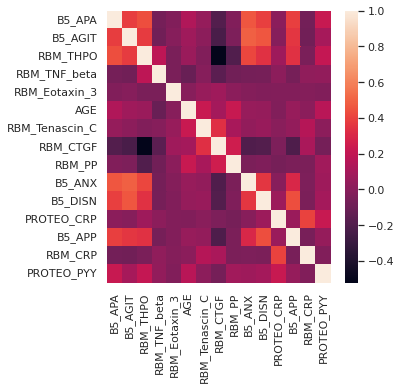

In [85]:
sns.heatmap(df2.loc[:,['B5_APA',
 'B5_AGIT',
 'RBM_THPO',
 'RBM_TNF_beta',
 'RBM_Eotaxin_3',
 'AGE',
 'RBM_Tenascin_C',
 'RBM_CTGF',
 'RBM_PP',
 'B5_ANX',
 'B5_DISN',
 'PROTEO_CRP',
 'B5_APP',
 'RBM_CRP',
 'PROTEO_PYY']
].corr())
# sns.set(rc={'figure.figsize':(5,5)})

**MODELING**

The following models will be considered.

1. Logistic Regression
2. XGBoost with Random Forest 
3. CatBoost
4.